# Getting Started

This Jupyter Notebook introduces the basic tools needed to complete the digital image processing assignments in [TDT4195](https://www.ntnu.edu/studies/courses/TDT4195/) using the Python programming language.

The notebook assumes that the following Python packages have been installed:

* [NumPy](http://www.numpy.org/)
* [Pillow](https://python-pillow.org/)
* [SciPy](https://www.scipy.org/)
* [matplotlib](http://matplotlib.org/)
* [scikit-image](http://scikit-image.org/)

If you are new to Jupyter notebook, then please have a look at the [Jupyter](https://jupyter.org/) website.

In [1]:
def fib(n):
    return n if n < 2 else fib(n - 1) + fib(n - 2)

list(map(fib, range(15)))

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377]

To run a notebook cell like the one above, all you have to do is hit **Shift-Enter** with the cell selected.

## NumPy arrays

The n-dimensional array, or ``ndarray``, is the fundamental component of both NumPy and SciPy. This section outlines some of the basic routines that can be done using these arrays.

The most common way to import NumPy:

In [2]:
import numpy as np

### Array construction

There are several ways in which NumPy arrays can be constructed. Two common ways are: (i) create them from Python lists and (ii) create vectors and matrices of all zeros, ones, or a constant value.

Here we create an array from a Python list using the ``numpy.array`` function:

In [3]:
np.array([1,2,3,4,5,6,7,8,9])

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

While creating the array, we can specify the data type. For example:

In [4]:
np.array([1,2,3,4,5,6,7,8,9], dtype=np.int8)     # 8-bit integer (-128 to 127)

array([1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int8)

In [5]:
np.array([1,2,3,4,5,6,7,8,9], dtype=np.uint8)    # 8-bit unsigned integer (0 to 255)

array([1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [6]:
np.array([1,2,3,4,5,6,7,8,9], dtype=np.float32)  # 32-bit single precision float

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.], dtype=float32)

Below are several examples where arrays are created using the ``numpy.zeros``, ``numpy.ones``, and ``numpy.full`` functions. Each is created using a tuple which describes the shape of the output array. The elements in this tuple are the number of rows and columns, respectively.

In [7]:
np.zeros((1,3))  # 1x3 row vector

array([[ 0.,  0.,  0.]])

In [8]:
np.zeros((3,1), dtype=np.float32)  # 3x1 column vector with an explicit data type 

array([[ 0.],
       [ 0.],
       [ 0.]], dtype=float32)

In [9]:
np.ones((3,3))  # 3x3 matrix

array([[ 1.,  1.,  1.],
       [ 1.,  1.,  1.],
       [ 1.,  1.,  1.]])

In [10]:
np.full((5,5), 4, dtype=np.int8)  # 5x5 matrix

array([[4, 4, 4, 4, 4],
       [4, 4, 4, 4, 4],
       [4, 4, 4, 4, 4],
       [4, 4, 4, 4, 4],
       [4, 4, 4, 4, 4]], dtype=int8)

NumPy also has the ``numpy.eye`` function for creating an arbitrary identity matrix.

In [11]:
np.eye(4)

array([[ 1.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  1.]])

It is also possible to create an array with random values:

In [12]:
np.random.random((3,4))  # 3x4 matrix

array([[ 0.44045739,  0.66016503,  0.20359326,  0.14191298],
       [ 0.97950411,  0.29953389,  0.31543248,  0.15863128],
       [ 0.73641139,  0.83337861,  0.43026088,  0.58994798]])

### Array indexing

NumPy arrays are indexed using standard Python syntax, e.g. ``x[i]``. Indexing in Python is 0-based, which means that indexing starts from ``0``. Let's create a vector and a matrix and see how it can be indexed.

In [13]:
vec = np.array([1,2,3,4,5,6], np.uint8)

mat = np.array([[1, 2, 3, 4],
                [5, 6, 7, 8],
                [9,10,11,12]], dtype=np.uint8)

Each field can easily be indexed like this:

In [14]:
vec[4]  # Fifth element

5

In [15]:
mat[2,1]  # Third row, second column

10

Notice that for matrices, the first element denotes the row, while the second denotes the column.

NumPy arrays can be sliced by passing a ``slice`` object which has the following look: `start:stop:stride`. For example:

In [16]:
vec[0:3]  # Only start and stop is used, the stride is assumed to be 1

array([1, 2, 3], dtype=uint8)

In [17]:
vec[0:5:2]

array([1, 3, 5], dtype=uint8)

In [18]:
mat[1:3,2:4]

array([[ 7,  8],
       [11, 12]], dtype=uint8)

In [19]:
mat[0:3:2,0:3:2]

array([[ 1,  3],
       [ 9, 11]], dtype=uint8)

Negative indices can be used to index an array backwards.

In [20]:
vec[-1]

6

In [21]:
mat[-1, -1]

12

### Basic operations

In [22]:
simple_matrix = np.array([[1,2,3],
                          [4,5,6],
                          [7,8,9]], dtype=np.uint8)

NumPy arrays have a slew of attributes that can be useful when you want more information about an array.

``numpy.ndarray.shape`` returns a tuple with the array shape.

In [23]:
simple_matrix.shape

(3, 3)

``numpy.ndarray.ndim`` returns the number of dimensions (often referred to as *rank*).

In [24]:
simple_matrix.ndim

2

``numpy.ndarray.size`` returns the total number of elements.

In [25]:
simple_matrix.size

9

``numpy.ndarray.dtype`` returns the data type

In [26]:
simple_matrix.dtype

dtype('uint8')

NumPy arrays can be *reshaped* to some other shape using ``numpy.ndarray.reshape``.

In [27]:
simple_matrix.reshape((9, 1))

array([[1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7],
       [8],
       [9]], dtype=uint8)

They can also be flatten to a 1-D vector using either ``numpy.ravel`` or ``numpy.ndarray.flatten``.

In [28]:
simple_matrix.ravel()

array([1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

The data type of an array can be changed using the ``numpy.ndarray.astype`` function. This is very useful when you have loaded data in a data type you do not want to use.

In [29]:
simple_matrix.astype(np.float32)

array([[ 1.,  2.,  3.],
       [ 4.,  5.,  6.],
       [ 7.,  8.,  9.]], dtype=float32)

An array can be transposed using ``numpy.ndarray.T``.

In [30]:
simple_matrix.T

array([[1, 4, 7],
       [2, 5, 8],
       [3, 6, 9]], dtype=uint8)

Pointwise operations are done using standard Python arithmetic operators.

In [31]:
simple_matrix + 2

array([[ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]], dtype=uint8)

In [32]:
simple_matrix * 2

array([[ 2,  4,  6],
       [ 8, 10, 12],
       [14, 16, 18]], dtype=uint8)

In [33]:
simple_matrix // 2  # Integer division

array([[0, 1, 1],
       [2, 2, 3],
       [3, 4, 4]], dtype=uint8)

In [34]:
simple_matrix.astype(np.uint16) ** 3  # Exponentiation where the exponent is 3

array([[  1,   8,  27],
       [ 64, 125, 216],
       [343, 512, 729]], dtype=uint16)

In the exponentiation example above, we had to change the data type to ``uint16`` because some of the elements in the resulting matrix are larger than 255 (8-bit).

In [35]:
twos = np.full((3,3), 2, dtype=np.uint8)  # 3x3 matrix of all twos
simple_matrix * twos

array([[ 2,  4,  6],
       [ 8, 10, 12],
       [14, 16, 18]], dtype=uint8)

In the example above, notice that the multiplication of the two matrices did **not** yield the matrix multiplication operation; it simply multiplied each element by ``2``. To do matrix multiplication the ``numpy.dot`` function must be used.

In [36]:
np.dot(simple_matrix, twos)

array([[12, 12, 12],
       [30, 30, 30],
       [48, 48, 48]], dtype=uint8)

For 1-D arrays the ``numpy.dot`` function is equivalent to the inner product of two vectors.

In [37]:
np.dot([1,2,3], [2,2,2])  # 1*2 + 2*2 + 3*2 = 12

12

Another simple operation between two vectors is the outer product: $u \otimes v = uv^\intercal$.

In [38]:
u = np.array([1,2,1], dtype=np.float32)
v = u.copy()

h = np.outer(u, v)  # Equivalent to u * np.array([v]).T
h /= 16
print(h)

[[ 0.0625  0.125   0.0625]
 [ 0.125   0.25    0.125 ]
 [ 0.0625  0.125   0.0625]]


### Array copy

Simple assignments do not make copies of the array object.

In [39]:
a = np.array([1,2,3,4,5])
b = a
b is a

True

To make a complete copy of an array the ``numpy.copy`` function can be used. This is generally referred to as a *deep copy*.

In [40]:
a = np.array([1,2,3,4,5])
b = a.copy()
b is a

False

Another option is to create a new array using the data of the old array.

In [41]:
a = np.array([1,2,3,4,5])
b = np.array(a)
b is a

False

## Basic plotting with matplotlib

The most common way to import matplotlib is by using ``pyplot``. ``%matplotlib inline`` is a Jupyter notebook command which allows us to plot inline.

In [42]:
%matplotlib inline
import matplotlib.pyplot as plt

Let's plot a basic line. The ``numpy.arange`` function returns a numpy array with evenly spaced values within an interval.

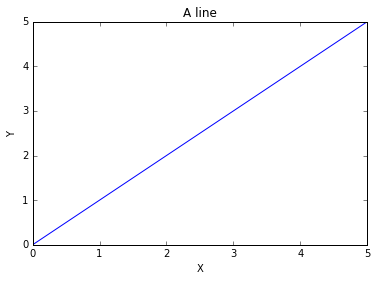

In [43]:
xs = np.arange(6)

plt.figure()
plt.plot(xs, xs)
plt.title('A line')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

Here is another example where we superimpose two sinusoidal curves. ``numpy.linspace`` is similar to ``arange`` but may be easier to use when we know the number of points we want.

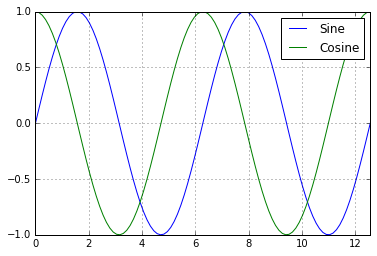

In [44]:
xs = np.linspace(0, 4*np.pi, num=100)  # 100 points between 0 and 4*pi
ys_sin = np.sin(xs)
ys_cos = np.cos(xs)

plt.figure()
plt.plot(xs, ys_sin, label='Sine')
plt.plot(xs, ys_cos, label='Cosine')
plt.xlim(0, 4*np.pi)  # Limit what is displayed in the x direction
plt.legend()  # Requires that each curve has a label
plt.grid()
plt.show()

Arbitrary functions can be plotted. For example, the 1-D Gaussian:

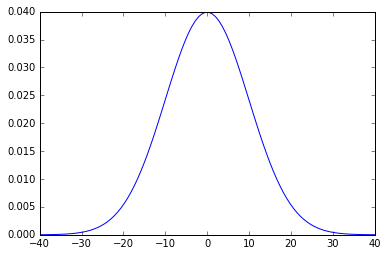

In [45]:
sigma = 10.0
mu = 0.0
xs = np.linspace(-40, 40, num=100)  # 100 points between -40 and 40
ys = np.exp(-(xs-mu)**2 / (2*sigma**2))
ys /= sigma*np.sqrt(2*np.pi)

plt.figure()
plt.plot(xs, ys)
plt.show()

## Loading and saving images

Many Python libraries that offer loading and saving of images simply use the API provided by *PIL* (Python Imaging Library) or the more recent fork: *Pillow*. In this guide, SciPy will be used as a wrapper to load images because it loads them straight into NumPy arrays.

In [46]:
from scipy import misc

Reading and saving images can be done using the ``scipy.misc.imread`` and ``scipy.misc.imsave`` functions, respectively.

## Images as NumPy arrays

Now that we know how to load images, let's load an image and display it using matplotlib.

In [47]:
image = misc.imread('./house.tiff')

In this example, the pixel interpolation has been forced to use nearest neighbour. This is especially useful when dealing with small images as we can see each pixel intensity clearly.

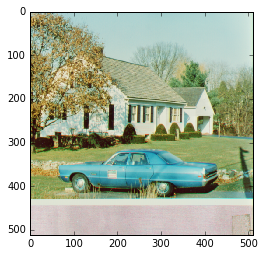

In [48]:
plt.figure()
plt.imshow(image, interpolation='nearest')
plt.show()

Seeing as we've loaded the image in a NumPy array, we can use everything we learned above to modify it. For example, let's try to transform it using the natural logarithm.

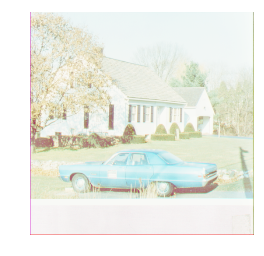

In [49]:
imagelog = image.astype(np.float32)
c = 255 / np.log(np.max(imagelog)+1)  # Scaling
imagelog = c * np.log(imagelog+1)
imagelog = imagelog.astype(np.uint8)

plt.figure()
plt.imshow(imagelog)
plt.axis('off')  # Turn of axis numbers and ticks
plt.show()

A simple colour image consists of three so-called colour channels: red, green, and blue. This means that ``image`` is in fact a three-dimensional array with the following shape:

In [50]:
image.shape

(512, 512, 3)

The first and second axis are the rows and columns respectively, while the last axis is the number of channels. The channels can be operated on separately. The following exemplifies how each channel can be plotted on its own using subplots:

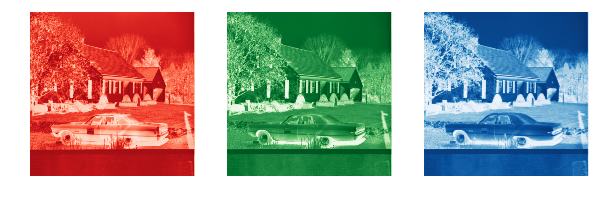

In [51]:
r = image[..., 0]  # Equivalent to image[:, :, 0]
g = image[..., 1]
b = image[..., 2]

_, ax = plt.subplots(1, 3, figsize=(10, 8))
ax[0].imshow(r, cmap=plt.cm.Reds)
ax[0].set_axis_off()
ax[1].imshow(g, cmap=plt.cm.Greens)
ax[1].set_axis_off()
ax[2].imshow(b, cmap=plt.cm.Blues)
ax[2].set_axis_off()
plt.show()

With this in mind we can try to rearrange the colour channels to BGR instead of RGB. In the following example we add the previously indexed colour channels to an empty image.

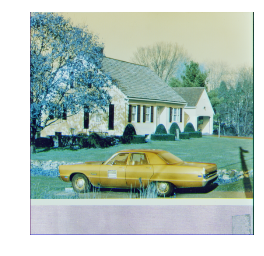

In [52]:
rearranged = np.zeros_like(image)  # Can also use: np.zeros(image.shape, dtype=image.dtype)
rearranged[:, :, 0] = b
rearranged[:, :, 1] = g
rearranged[:, :, 2] = r

plt.figure()
plt.imshow(rearranged)
plt.axis('off')
plt.show()

For now, let's assume that the red colour channel is a greyscale image.

In [53]:
grey = image[..., 0]
grey.shape

(512, 512)

When displaying an image with a single colour channel, such as a greyscale image, it is important to specify the correct colour map. In this case, it would be natural to use the ``matplotlib.cm.gray`` colour map. If this is not done, matplotlib will elect to use the default colour map instead. See the difference below.

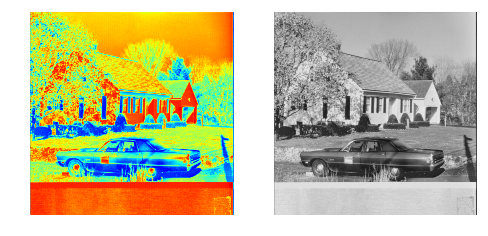

In [54]:
_, ax = plt.subplots(1, 2, figsize=(8, 6))
ax[0].imshow(grey)
ax[0].set_axis_off()
ax[1].imshow(grey, cmap=plt.cm.gray)
ax[1].set_axis_off()
plt.show()

Below is an example where we see the difference between two interpolation types: ``nearest`` and ``bilinear``.

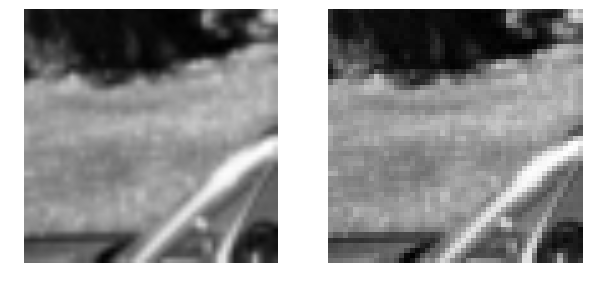

In [55]:
cropped = grey[300:350, 150:200]

_, ax = plt.subplots(1, 2, figsize=(10, 8))
ax[0].imshow(cropped, interpolation='bilinear', cmap=plt.cm.gray)
ax[0].set_axis_off()
ax[1].imshow(cropped, interpolation='nearest', cmap=plt.cm.gray)
ax[1].set_axis_off()
plt.show()

Seeing as images are NumPy arrays, we can index them just like we did above. For example, we can inspect a pixel intensity in a greyscale image like this:

In [56]:
grey[100, 40]

188

When inspecting pixel intensities in a colour image, it is important to note that there are three values instead of one value.

In [57]:
image[100, 40]

array([188, 193, 156], dtype=uint8)

### Image histogram

An image histogram is a representation where we count up the number of times an intensity occurs in an image. Using basic probability, we can normalise the image histogram to get an estimate of the probability of any intensity level occurring in the image. The following code snippet visualises an image histogram for a greyscale image:

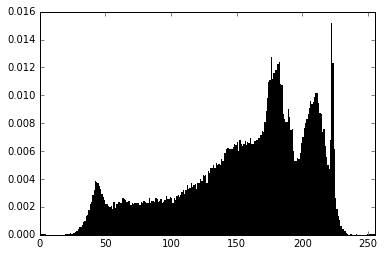

In [58]:
hist, bin_edges = np.histogram(grey, bins=255, range=(0, 255), density=True)

plt.figure()
plt.bar(bin_edges[:-1], hist, width=1, linewidth=0, color='black')
plt.xlim(0, 255)
plt.show()

It is also possible to create a colour image histogram by superimposing three histograms, one for each colour channel.

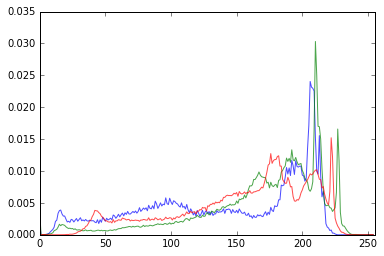

In [59]:
red_hist, red_bin_edges = np.histogram(r, bins=255, range=(0, 255), density=True)
green_hist, green_bin_edges = np.histogram(g, bins=255, range=(0, 255), density=True)
blue_hist, blue_bin_edges = np.histogram(b, bins=255, range=(0, 255), density=True)

# Using `plot` instead of `bar` to make it easier to see each histogram
plt.figure()
plt.plot(blue_bin_edges[:-1], blue_hist, alpha=0.7, color='b')
plt.plot(green_bin_edges[:-1], green_hist, alpha=0.7, color='g')
plt.plot(red_bin_edges[:-1], red_hist, alpha=0.7, color='r')
plt.xlim(0, 255)
plt.show()

### Simple thresholding

NumPy arrays can be indexed using a mask of boolean values. For example:

In [60]:
grey > 128

array([[False,  True, False, ...,  True,  True,  True],
       [False,  True,  True, ...,  True, False, False],
       [False,  True,  True, ...,  True, False, False],
       ..., 
       [False,  True,  True, ...,  True, False, False],
       [False,  True,  True, ...,  True, False, False],
       [False,  True,  True, ...,  True, False, False]], dtype=bool)

With this in mind, we can easily do thresholding on an image if we have a threshold value. In this example, all pixel intensities above ``128`` will be set to ``255``, while all other pixel intensities are set to ``0``. Notice how the image is indexed using the boolean mask created by the threshold.

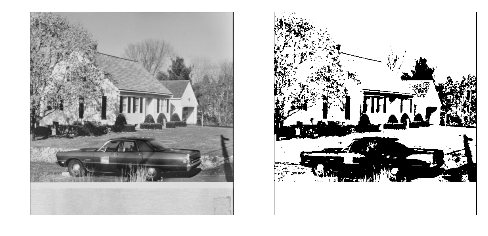

In [61]:
threshold = 128
thresholded_image = np.zeros_like(image)
thresholded_image[grey > threshold] = 255

_, ax = plt.subplots(1, 2, figsize=(8, 6))
ax[0].imshow(grey, cmap=plt.cm.gray)
ax[0].set_axis_off()
ax[1].imshow(thresholded_image, cmap=plt.cm.gray)
ax[1].set_axis_off()
plt.show()

Matplotlib can display binary images as well.

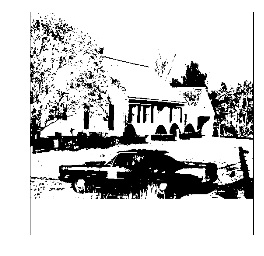

In [62]:
binary_image = grey > threshold

plt.figure()
plt.imshow(binary_image, plt.cm.gray)
plt.axis('off')  # Turns of axis numbers and ticks
plt.show()

### Image traversal

Knowing how to traverse an image in scanline will be quite useful for the assignments. Traversing an image in scanline means that we inspect each pixel, row by row. Below is an example, where every other pixel, in the previously used colour image, is set to black.

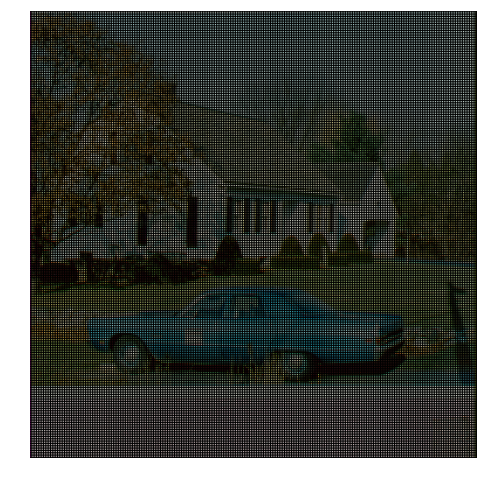

In [63]:
nb_rows = image.shape[0]
nb_cols = image.shape[1]

new_image = np.zeros_like(image)

for y in range(nb_rows):
    for x in range(nb_cols):
        # Do something for each pixel here
        if y % 2 == 0 and x % 2 == 0:
            new_image[y, x, :] = image[y, x]

plt.figure(figsize=(8, 8))
plt.imshow(new_image, plt.cm.gray)
plt.axis('off')
plt.show()

### scikit-image

Scikit-image is a highly useful package that contains a collection of image processing and computer vision algorithms. For example, we can use the Canny edge detector to isolate probable edges in a greyscale image.

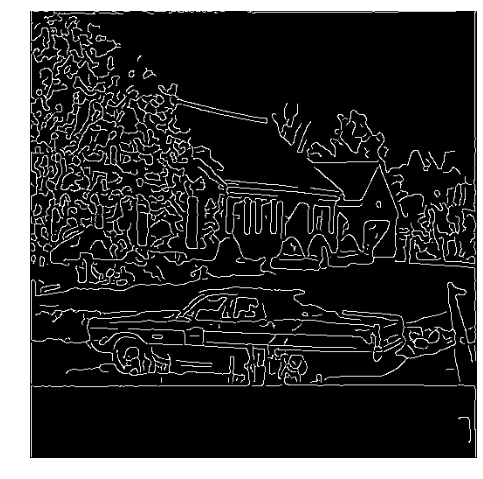

In [64]:
from skimage.feature import canny

norm_grey = grey.astype(np.float) / 255
edges = canny(norm_grey, sigma=2.0, low_threshold=0.1, high_threshold=0.2)

plt.figure(figsize=(8, 8))
plt.imshow(edges, plt.cm.gray)
plt.axis('off')
plt.show()

Here is another example where we use the Harris & Stephens corner detector to identify probable corners. These may be used for further analysis of the image.

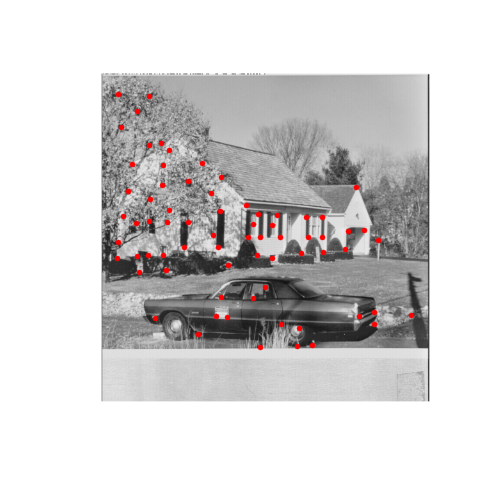

In [65]:
from skimage.feature import corner_harris, corner_peaks

harris = corner_harris(grey, sigma=5)
corners = corner_peaks(harris, min_distance=10)

plt.figure(figsize=(8, 8))
plt.imshow(grey, plt.cm.gray)
plt.plot(corners[:, 1], corners[:, 0], '.r', markersize=10)
plt.axis('off')
plt.show()